In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("wifi_scan_results.csv")

# Convert 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate the first timestamp for each Location_ID
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds())

data

,Timestamp,Location_X,Location_Y,BSSID,SSID,Frequency (GHz),RSSI (dBm),Quality,measurement_time
0,2024-11-07 19:00:41,5.0,0.0,C6:2D:C6:20:3A:6D,L2G,5.785,-58,52/70,0.0
1,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F0,eduroam,5.785,-46,64/70,0.0
2,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F1,UofM-Guest,5.785,-46,64/70,0.0
3,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F2,UofM-IoT,5.785,-47,63/70,0.0
4,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:5C:C1:D0,eduroam,5.745,-82,28/70,0.0
...,...,...,...,...,...,...,...,...,...
79209,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:5C:C9:22,UofM-IoT,2.412,-84,26/70,178.0
79210,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:64:B8:12,UofM-IoT,5.320,-90,20/70,178.0
79211,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:5C:C1:D0,eduroam,5.745,-78,32/70,178.0
79212,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:5C:C1:D1,UofM-Guest,5.745,-79,31/70,178.0


In [4]:
data = pd.read_csv("wifi_scan_results.csv")

# Convert 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Count the number of unique timestamps
unique_timestamps = data['Timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")

Number of unique timestamps: 1631


In [3]:
ap_we_want = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0", "70:3A:0E:60:E8:E1", "70:3A:0E:60:E8:F1", "70:3A:0E:60:E8:E2", "70:3A:0E:60:E8:F2"]

ap_data = data[data['BSSID'].isin(ap_we_want)]

ap_data

,Timestamp,Location_X,Location_Y,BSSID,SSID,Frequency (GHz),RSSI (dBm),Quality,measurement_time
1,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F0,eduroam,5.785,-46,64/70,0.0
2,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F1,UofM-Guest,5.785,-46,64/70,0.0
3,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:F2,UofM-IoT,5.785,-47,63/70,0.0
19,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:E0,eduroam,2.412,-43,67/70,0.0
20,2024-11-07 19:00:41,5.0,0.0,70:3A:0E:60:E8:E1,UofM-Guest,2.412,-43,67/70,0.0
...,...,...,...,...,...,...,...,...,...
79166,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:60:E8:E1,UofM-Guest,2.412,-48,62/70,178.0
79167,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:60:E8:E2,UofM-IoT,2.412,-48,62/70,178.0
79178,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:60:E8:F0,eduroam,5.785,-53,57/70,178.0
79179,2024-11-07 23:13:48,15.0,-10.0,70:3A:0E:60:E8:F1,UofM-Guest,5.785,-53,57/70,178.0


Global Min RSSI: -60.90909090909091 dBm
Global Max RSSI: -38.472972972972975 dBm


C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\472599731.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


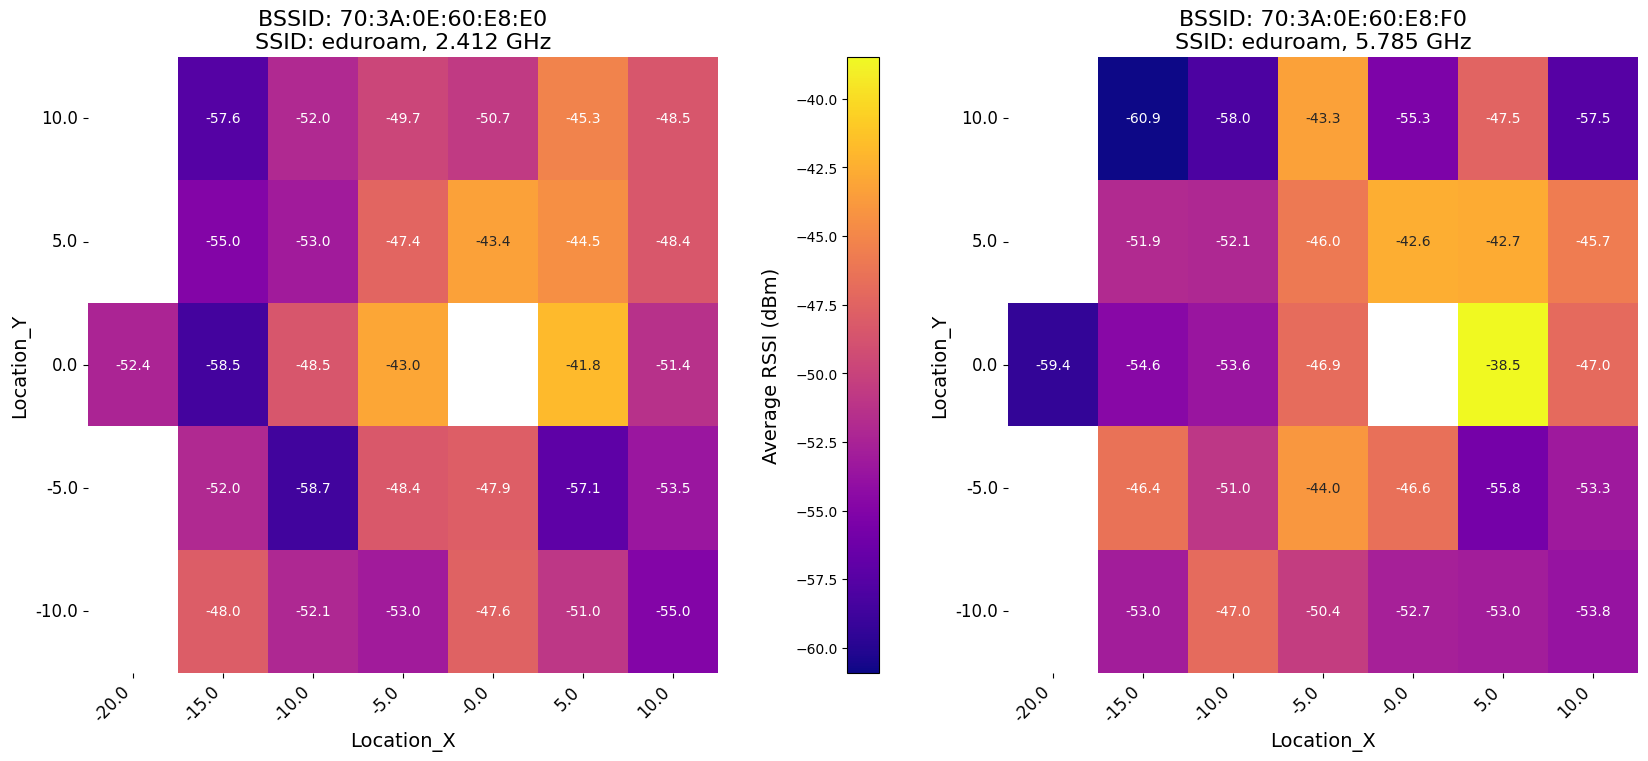

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 1. Load the dataset
df = data.copy()
df['Location_X'] = -df['Location_X']

# Define the BSSID values you want to visualize
bssid_values = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0"]

def prepare_heatmap_data(df, bssid):
    """
    Prepares pivoted heatmap data for a given BSSID.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing AP data.
    - bssid (str): The BSSID value to filter.
    
    Returns:
    - heatmap_data (pd.DataFrame): Pivoted DataFrame for heatmap.
    - ssid (str): SSID corresponding to the BSSID.
    - frequency (float): Frequency (GHz) corresponding to the BSSID.
    """
    # Filter the DataFrame for the specified BSSID
    df_filtered = df[df['BSSID'] == bssid]
    
    # Check if the filtered DataFrame is empty
    if df_filtered.empty:
        print(f"No data available for BSSID: {bssid}")
        return None, None, None
    
    # Extract SSID and Frequency (GHz) for the BSSID
    ssid = df_filtered['SSID'].iloc[0]
    frequency = df_filtered['Frequency (GHz)'].iloc[0]
    
    # Calculate the average RSSI for each (Location_X, Location_Y) pair
    avg_rssi = df_filtered.groupby(['Location_X', 'Location_Y'])['RSSI (dBm)'].mean().reset_index()
    
    # Pivot the data to create a matrix suitable for a heatmap
    heatmap_data = avg_rssi.pivot(index='Location_Y', columns='Location_X', values='RSSI (dBm)')
    
    # Sort the Y-axis for better visualization (from top to bottom)
    heatmap_data = heatmap_data.sort_index(ascending=False)
    
    return heatmap_data, ssid, frequency

# Step 1: Compute Unified Scale (vmin and vmax)

# Filter the DataFrame for the specified BSSID values
df_filtered_all = df[df['BSSID'].isin(bssid_values)]

# Calculate the average RSSI for each (BSSID, Location_X, Location_Y) pair
avg_rssi_all = df_filtered_all.groupby(['BSSID', 'Location_X', 'Location_Y'])['RSSI (dBm)'].mean().reset_index()

# Determine the global minimum and maximum average RSSI values
global_min = avg_rssi_all['RSSI (dBm)'].min()
global_max = avg_rssi_all['RSSI (dBm)'].max()

print(f"Global Min RSSI: {global_min} dBm")
print(f"Global Max RSSI: {global_max} dBm")

# Step 2: Prepare heatmap data for both BSSIDs
heatmap_data_1, ssid_1, frequency_1 = prepare_heatmap_data(df, bssid_values[0])
heatmap_data_2, ssid_2, frequency_2 = prepare_heatmap_data(df, bssid_values[1])

# Check if both heatmaps have data
if heatmap_data_1 is None or heatmap_data_2 is None:
    print("One or both BSSIDs have no data. Exiting.")
    exit()

# Step 3: Create a matplotlib figure with GridSpec
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.05, 1], wspace=0.3)

# Create subplots for the two heatmaps
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])

# Plot the first heatmap
sns.heatmap(
    heatmap_data_1,
    annot=True,
    fmt=".1f",
    cmap='plasma',
    cbar=False,  # Disable individual colorbar
    ax=ax1,
    vmin=global_min,
    vmax=global_max,
    xticklabels=heatmap_data_1.columns,
    yticklabels=heatmap_data_1.index
)

# Customize the first heatmap
ax1.set_title(f'BSSID: {bssid_values[0]}\nSSID: {ssid_1}, {frequency_1} GHz', fontsize=16)
ax1.set_xlabel('Location_X', fontsize=14)
ax1.set_ylabel('Location_Y', fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=12)

# Plot the second heatmap
sns.heatmap(
    heatmap_data_2,
    annot=True,
    fmt=".1f",
    cmap='plasma',
    cbar=False,  # Disable individual colorbar
    ax=ax2,
    vmin=global_min,
    vmax=global_max,
    xticklabels=heatmap_data_2.columns,
    yticklabels=heatmap_data_2.index
)

# Customize the second heatmap
ax2.set_title(f'BSSID: {bssid_values[1]}\nSSID: {ssid_2}, {frequency_2} GHz', fontsize=16)
ax2.set_xlabel('Location_X', fontsize=14)
ax2.set_ylabel('Location_Y', fontsize=14)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(ax2.get_yticklabels(), rotation=0, fontsize=12)

# Create a single colorbar for both heatmaps
cbar_ax = fig.add_subplot(gs[1])

# Normalize based on global min and max
norm = plt.Normalize(vmin=global_min, vmax=global_max)

# Create a ScalarMappable and initialize a colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib

# Create the colorbar on the left side of the colorbar axis
cbar = fig.colorbar(sm, cax=cbar_ax)

# Set the label for the colorbar
cbar.set_label('Average RSSI (dBm)', fontsize=14, labelpad=10)

# Move the colorbar's tick labels and label to the left side
cbar.ax.yaxis.set_ticks_position('left')       # Move ticks to left
cbar.ax.yaxis.set_label_position('left')      # Move label to left

# Adjust the colorbar tick label alignment
cbar.ax.tick_params(labelleft=True, labelright=False)  # Show labels only on the left

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


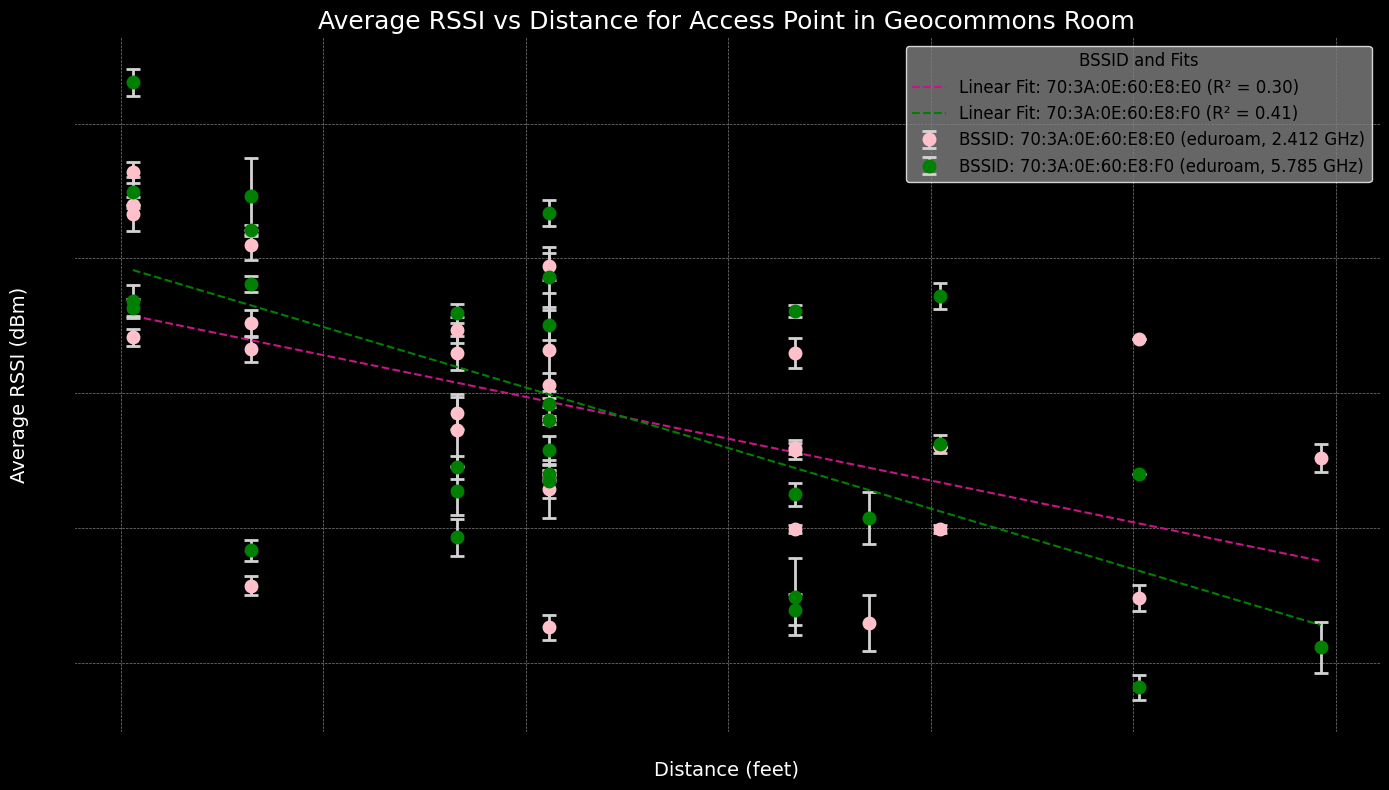

BSSID: 70:3A:0E:60:E8:E0
Linear Fit Parameters: a = -0.7749, b = -39.29
Coefficient of Determination (R²): 0.30

BSSID: 70:3A:0E:60:E8:F0
Linear Fit Parameters: a = -1.1225, b = -34.07
Coefficient of Determination (R²): 0.41



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Load the dataset
df = data.copy()

# Negate the Location_X values as specified
df['Location_X'] = -df['Location_X']

# 2. Define the BSSID values you want to visualize and their corresponding colors
bssid_values = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0"]
# Color for scatter points
scatter_colors = {'70:3A:0E:60:E8:E0': 'pink', '70:3A:0E:60:E8:F0': 'green'}
# Color for fit lines
fit_colors = {'70:3A:0E:60:E8:E0': '#C71585', '70:3A:0E:60:E8:F0': 'green'}

# 3. Fixed Z height in meters
Z = 8.799

# 4. Calculate Distance
df['Distance'] = np.sqrt(df['Location_X']**2 + df['Location_Y']**2 + Z**2)

# 5. Group by BSSID, Location_X, Location_Y to calculate average RSSI, std deviation, and distance
aggregated_data = df[df['BSSID'].isin(bssid_values)].groupby(['BSSID', 'Location_X', 'Location_Y']).agg(
    avg_rssi=('RSSI (dBm)', 'mean'),
    std_rssi=('RSSI (dBm)', 'std'),
    distance=('Distance', 'first')  # Distance is unique per (X, Y) pair
).reset_index()

# 6. Define the linear function for fitting
def linear_func(x, a, b):
    return a * x + b

# 7. Fit linear curves to each BSSID and calculate R²
fit_results = {}

for bssid in bssid_values:
    # Filter data for the current BSSID
    data_bssid = aggregated_data[aggregated_data['BSSID'] == bssid]
    
    # Ensure there are enough data points to fit
    if len(data_bssid) < 2:
        print(f"Not enough data points to fit for BSSID: {bssid}")
        continue
    
    # Extract SSID and Frequency (GHz) for the BSSID
    ssid_series = df[df['BSSID'] == bssid]['SSID'].unique()
    frequency_series = df[df['BSSID'] == bssid]['Frequency (GHz)'].unique()
    
    if len(ssid_series) == 0 or len(frequency_series) == 0:
        print(f"Missing SSID or Frequency data for BSSID: {bssid}")
        continue
    
    ssid = ssid_series[0]
    frequency = frequency_series[0]
    
    # Initial guesses for a and b
    initial_guess = [0, np.min(data_bssid['avg_rssi'])]  # Starting with slope=0 and intercept=min RSSI
    
    try:
        # Fit the linear function to the data
        params, covariance = curve_fit(linear_func, data_bssid['distance'], data_bssid['avg_rssi'], p0=initial_guess)
        a, b = params
        
        # Calculate R²
        residuals = data_bssid['avg_rssi'] - linear_func(data_bssid['distance'], a, b)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((data_bssid['avg_rssi'] - np.mean(data_bssid['avg_rssi']))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Store the results along with SSID and Frequency
        fit_results[bssid] = {
            'a': a,
            'b': b,
            'r_squared': r_squared,
            'ssid': ssid,
            'frequency': frequency
        }
        
    except RuntimeError:
        print(f"Linear fit did not converge for BSSID: {bssid}")

# 8. Plot the scatter plot with both BSSIDs and their linear fits
plt.figure(figsize=(14, 8), facecolor='black')  # Set figure background to black
ax = plt.gca()
ax.set_facecolor('black')  # Set axes background to black

for bssid in bssid_values:
    # Filter data for the current BSSID
    data_bssid = aggregated_data[aggregated_data['BSSID'] == bssid]
    
    # Extract SSID and Frequency (GHz) for labeling
    if bssid in fit_results:
        ssid = fit_results[bssid]['ssid']
        frequency = fit_results[bssid]['frequency']
        label_bssid = f'BSSID: {bssid} ({ssid}, {frequency} GHz)'
    else:
        # Fallback if fit_results does not have the entry
        ssid_series = df[df['BSSID'] == bssid]['SSID'].unique()
        frequency_series = df[df['BSSID'] == bssid]['Frequency (GHz)'].unique()
        ssid = ssid_series[0] if len(ssid_series) > 0 else 'Unknown'
        frequency = frequency_series[0] if len(frequency_series) > 0 else 'Unknown'
        label_bssid = f'BSSID: {bssid} ({ssid}, {frequency} GHz)'
    
    # Plot scatter points with error bars
    plt.errorbar(
        data_bssid['distance'], 
        data_bssid['avg_rssi'], 
        yerr=data_bssid['std_rssi'], 
        fmt='o', 
        capsize=5, 
        label=label_bssid,
        markersize=8,
        color=scatter_colors[bssid],
        ecolor='lightgray',
        elinewidth=2,
        markeredgewidth=2
    )
    
    # Plot linear fit if available
    if bssid in fit_results:
        a = fit_results[bssid]['a']
        b = fit_results[bssid]['b']
        r_squared = fit_results[bssid]['r_squared']
        
        x_fit = np.linspace(data_bssid['distance'].min(), data_bssid['distance'].max(), 100)
        y_fit = linear_func(x_fit, a, b)
        
        label_fit = f'Linear Fit: {bssid} (R² = {r_squared:.2f})'
        plt.plot(x_fit, y_fit, color=fit_colors[bssid], linestyle='--', label=label_fit)

# Chart customization
plt.title('Average RSSI vs Distance for Access Point in Geocommons Room', fontsize=18, color='white')
plt.xlabel('Distance (feet)', fontsize=14, color='white')
plt.ylabel('Average RSSI (dBm)', fontsize=14, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='BSSID and Fits', facecolor='gray', edgecolor='white', fontsize=12, title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# 9. Optional: Display fit parameters
for bssid, params in fit_results.items():
    a = params['a']
    b = params['b']
    r_squared = params['r_squared']
    ssid = params['ssid']
    frequency = params['frequency']
    print(f"BSSID: {bssid}")
    print(f"Linear Fit Parameters: a = {a:.4f}, b = {b:.2f}")
    print(f"Coefficient of Determination (R²): {r_squared:.2f}\n")


In [ ]:
#Full model to predict X and Y location

In [62]:
# train_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
import joblib  # For saving the scaler
import random
import os

# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# 1. Load the dataset
data = pd.read_csv("wifi_scan_results.csv")

# Drop rows with SSID 'L2G'
data = data[data['SSID'] != 'L2G'].copy()  # Added line to drop 'L2G' SSID

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate 'measurement_time' as seconds since the first measurement at each location
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(
    lambda x: (x - x.min()).dt.total_seconds()
)

# Copy data for model training
data['Location_X'] = -data['Location_X']
df = data.copy()

# Label Encoding for BSSID
le_bssid = LabelEncoder()
df['BSSID_encoded'] = le_bssid.fit_transform(df['BSSID'])

# One-Hot Encoding for Frequency
df = pd.get_dummies(df, columns=['Frequency (GHz)'], prefix='Freq')

# Determine the top N most frequent BSSIDs
top_n = 100  # Adjust based on your dataset
top_bssids = df['BSSID'].value_counts().nlargest(top_n).index.tolist()

# Ensure that the specific BSSIDs are included in top_bssids
specific_bssids = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0"]
for bssid in specific_bssids:
    if bssid not in top_bssids:
        top_bssids.append(bssid)

# Filter the dataframe to include only top BSSIDs
df_top = df[df['BSSID'].isin(top_bssids)].copy()

# Pivot RSSI values
wifi_rssi = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values='RSSI (dBm)',
    aggfunc='mean'
)

# Rename columns to indicate RSSI
wifi_rssi.columns = [f'RSSI_{bssid}' for bssid in wifi_rssi.columns]

# Pivot Frequency values
freq_cols = [col for col in df_top.columns if 'Freq_' in col]
wifi_freq = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values=freq_cols,
    aggfunc='max'
)

# Flatten MultiIndex columns
wifi_freq.columns = [f"{freq}_{bssid}" for freq, bssid in wifi_freq.columns]

# Combine RSSI and Frequency
wifi_features = pd.concat([wifi_rssi, wifi_freq], axis=1)

# Fill missing RSSI with default value (e.g., -100 dBm)
wifi_features = wifi_features.fillna(-100)

# Fill missing Frequency with 0 (since one-hot)
wifi_features = wifi_features.fillna(0)

# Merge with location data
location = df_top.groupby('Timestamp')[['Location_X', 'Location_Y']].first()
features = wifi_features.merge(location, left_index=True, right_index=True)

# Define input features and target variables
X = features.drop(['Location_X', 'Location_Y'], axis=1)
y = features[['Location_X', 'Location_Y']]

# -------------------------------
# Neural Network Model Training
# -------------------------------

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in the app
joblib.dump(scaler, 'scaler.joblib')

# Build the neural network model
input_dim = X_train_scaled.shape[1]
model = models.Sequential([
    layers.Dense(128, input_dim=input_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(2, activation='linear')  # Output layer for X and Y
])

# Compile the model with RMSE and MAE as metrics
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', RootMeanSquaredError(name='rmse')]
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the model
test_metrics = model.evaluate(X_test_scaled, y_test, verbose=2)
# The evaluate method returns [loss, mae, rmse] based on the metrics specified
test_mse = test_metrics[0]
test_mae = test_metrics[1]
test_rmse = test_metrics[2]

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R² score for each target variable and average them
r2_x = r2_score(y_test['Location_X'], y_pred[:, 0])
r2_y = r2_score(y_test['Location_Y'], y_pred[:, 1])
r2_avg = (r2_x + r2_y) / 2

print(f"Test R² for Location_X: {r2_x}")
print(f"Test R² for Location_Y: {r2_y}")
print(f"Average Test R²: {r2_avg}")

# Save the trained model
model.save('model.h5')

C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\3925023418.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wifi_features = wifi_features.fillna(-100)


Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 37.1310 - mae: 4.5879 - rmse: 6.0680 - val_loss: 9.9610 - val_mae: 2.4249 - val_rmse: 3.1073
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 15.0460 - mae: 2.9626 - rmse: 3.8395 - val_loss: 5.2687 - val_mae: 1.6624 - val_rmse: 2.2279
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 11.8757 - mae: 2.6058 - rmse: 3.4015 - val_loss: 4.6962 - val_mae: 1.5533 - val_rmse: 2.0953
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 10.4369 - mae: 2.4125 - rmse: 3.1828 - val_loss: 3.7880 - val_mae: 1.3693 - val_rmse: 1.8655
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 8.3793 - mae: 2.1690 - rmse: 2.8409 - val_loss: 3.5328 - val_mae: 1.3243 - val_rmse: 1.7955
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 8.1399 - mae: 2.1470 - rmse: 2.7983 - val_loss: 2.7430 - val_mae: 1.1202 - val_rmse: 1.5598
Epoch 

C:\Users\Logan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Partial model to predict X and Y location

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
import joblib  # For saving the scaler
import random
import os

# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# 1. Load the dataset
data = pd.read_csv("wifi_scan_results.csv")

# Drop rows with SSID 'L2G'
data = data[data['SSID'] != 'L2G'].copy()  # Added line to drop 'L2G' SSID

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate 'measurement_time' as seconds since the first measurement at each location
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(
    lambda x: (x - x.min()).dt.total_seconds()
)

# Copy data for model training
data['Location_X'] = -data['Location_X']
df = data.copy()

# Label Encoding for BSSID
le_bssid = LabelEncoder()
df['BSSID_encoded'] = le_bssid.fit_transform(df['BSSID'])

# One-Hot Encoding for Frequency
df = pd.get_dummies(df, columns=['Frequency (GHz)'], prefix='Freq')

# -------------------------------------
# **Filtering to Specific BSSID Values**
# -------------------------------------

# Define the list of specific BSSID values to retain
specific_bssids = [
    "70:3A:0E:60:E8:E0",
    "70:3A:0E:60:E8:F0",
    "70:3A:0E:60:E8:E1",
    "70:3A:0E:60:E8:F1",
    "70:3A:0E:60:E8:E2",
    "70:3A:0E:60:E8:F2"
]

# Filter the dataframe to include only the specified BSSIDs
df_filtered = df[df['BSSID'].isin(specific_bssids)].copy()

# If you want to ensure that all specified BSSIDs are present after filtering
missing_bssids = set(specific_bssids) - set(df_filtered['BSSID'].unique())
if missing_bssids:
    print(f"Warning: The following BSSIDs are not present in the data and will be ignored: {missing_bssids}")

# Pivot RSSI values
wifi_rssi = df_filtered.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values='RSSI (dBm)',
    aggfunc='mean'
)

# Rename columns to indicate RSSI
wifi_rssi.columns = [f'RSSI_{bssid}' for bssid in wifi_rssi.columns]

# Pivot Frequency values
freq_cols = [col for col in df_filtered.columns if 'Freq_' in col]
wifi_freq = df_filtered.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values=freq_cols,
    aggfunc='max'
)

# Flatten MultiIndex columns
wifi_freq.columns = [f"{freq}_{bssid}" for freq, bssid in wifi_freq.columns]

# Combine RSSI and Frequency
wifi_features = pd.concat([wifi_rssi, wifi_freq], axis=1)

# Fill missing RSSI with default value (e.g., -100 dBm)
wifi_features = wifi_features.fillna(-100)

# Fill missing Frequency with 0 (since one-hot)
wifi_features = wifi_features.fillna(0)

# Merge with location data
location = df_filtered.groupby('Timestamp')[['Location_X', 'Location_Y']].first()
features = wifi_features.merge(location, left_index=True, right_index=True)

# Define input features and target variables
X = features.drop(['Location_X', 'Location_Y'], axis=1)
y = features[['Location_X', 'Location_Y']]

# -------------------------------
# Neural Network Model Training
# -------------------------------

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in the app
joblib.dump(scaler, 'scaler.joblib')

# Build the neural network model
input_dim = X_train_scaled.shape[1]
model = models.Sequential([
    layers.Dense(128, input_dim=input_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(2, activation='linear')  # Output layer for X and Y
])

# Compile the model with RMSE and MAE as metrics
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', RootMeanSquaredError(name='rmse')]
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the model
test_metrics = model.evaluate(X_test_scaled, y_test, verbose=2)
# The evaluate method returns [loss, mae, rmse] based on the metrics specified
test_mse = test_metrics[0]
test_mae = test_metrics[1]
test_rmse = test_metrics[2]

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R² score for each target variable and average them
r2_x = r2_score(y_test['Location_X'], y_pred[:, 0])
r2_y = r2_score(y_test['Location_Y'], y_pred[:, 1])
r2_avg = (r2_x + r2_y) / 2

print(f"Test R² for Location_X: {r2_x}")
print(f"Test R² for Location_Y: {r2_y}")
print(f"Average Test R²: {r2_avg}")

# Save the trained model
model.save('model.h5')


Epoch 1/100


C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\3480081662.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wifi_features = wifi_features.fillna(-100)


33/33 [==============================] - 1s 6ms/step - loss: 67.0803 - mae: 6.6767 - rmse: 8.1799 - val_loss: 62.9061 - val_mae: 6.5909 - val_rmse: 7.9221
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 60.7587 - mae: 6.4970 - rmse: 7.7863 - val_loss: 56.0240 - val_mae: 6.3556 - val_rmse: 7.4768
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 56.0765 - mae: 6.2655 - rmse: 7.4807 - val_loss: 53.1916 - val_mae: 6.1511 - val_rmse: 7.2857
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 54.8791 - mae: 6.1773 - rmse: 7.4008 - val_loss: 52.3701 - val_mae: 6.1276 - val_rmse: 7.2295
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 53.9620 - mae: 6.1634 - rmse: 7.3388 - val_loss: 51.7519 - val_mae: 6.1035 - val_rmse: 7.1867
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 53.2153 - mae: 6.0936 - rmse: 7.2877 - val_loss: 50.9980 - val_mae: 6.0279 - val_rmse: 7.1339
Epoch 7/10

C:\Users\Logan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Full model predict distance

In [60]:
# train_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
import joblib  # For saving the scaler
import random
import os

# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# 1. Load the dataset
data = pd.read_csv("wifi_scan_results.csv")

# Drop rows with SSID 'L2G'
data = data[data['SSID'] != 'L2G'].copy()  # Added line to drop 'L2G' SSID

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate 'measurement_time' as seconds since the first measurement at each location
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(
    lambda x: (x - x.min()).dt.total_seconds()
)

# Copy data for model training
data['Location_X'] = -data['Location_X']
df = data.copy()

# Label Encoding for BSSID
le_bssid = LabelEncoder()
df['BSSID_encoded'] = le_bssid.fit_transform(df['BSSID'])

# One-Hot Encoding for Frequency
df = pd.get_dummies(df, columns=['Frequency (GHz)'], prefix='Freq')

# Determine the top N most frequent BSSIDs
top_n = 100  # Adjust based on your dataset
top_bssids = df['BSSID'].value_counts().nlargest(top_n).index.tolist()

# Ensure that the specific BSSIDs are included in top_bssids
specific_bssids = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0"]
for bssid in specific_bssids:
    if bssid not in top_bssids:
        top_bssids.append(bssid)

# Filter the dataframe to include only top BSSIDs
df_top = df[df['BSSID'].isin(top_bssids)].copy()

# Pivot RSSI values
wifi_rssi = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values='RSSI (dBm)',
    aggfunc='mean'
)

# Rename columns to indicate RSSI
wifi_rssi.columns = [f'RSSI_{bssid}' for bssid in wifi_rssi.columns]

# Pivot Frequency values
freq_cols = [col for col in df_top.columns if 'Freq_' in col]
wifi_freq = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values=freq_cols,
    aggfunc='max'
)

# Flatten MultiIndex columns
wifi_freq.columns = [f"{freq}_{bssid}" for freq, bssid in wifi_freq.columns]

# Combine RSSI and Frequency
wifi_features = pd.concat([wifi_rssi, wifi_freq], axis=1)

# Fill missing RSSI with default value (e.g., -100 dBm)
wifi_features = wifi_features.fillna(-100)

# Fill missing Frequency with 0 (since one-hot)
wifi_features = wifi_features.fillna(0)

# Merge with location data
location = df_top.groupby('Timestamp')[['Location_X', 'Location_Y']].first()
features = wifi_features.merge(location, left_index=True, right_index=True)

# -------------------------------
# Calculate Distance
# -------------------------------

# Define Z. If Z is a known constant, set it here. For example:
Z = 0  # Replace with actual value if different

# Calculate 'Distance'
features['Distance'] = np.sqrt(features['Location_X']**2 + features['Location_Y']**2 + Z**2)

# Define input features and target variable
X = features.drop(['Location_X', 'Location_Y', 'Distance'], axis=1)
y = features['Distance']

# -------------------------------
# Neural Network Model Training
# -------------------------------

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in the app
joblib.dump(scaler, 'scaler.joblib')

# Build the neural network model
input_dim = X_train_scaled.shape[1]
model = models.Sequential([
    layers.Dense(128, input_dim=input_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')  # Output layer for Distance
])

# Compile the model with RMSE and MAE as metrics
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', RootMeanSquaredError(name='rmse')]
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the model
test_metrics = model.evaluate(X_test_scaled, y_test, verbose=2)
# The evaluate method returns [loss, mae, rmse] based on the metrics specified
test_mse = test_metrics[0]
test_mae = test_metrics[1]
test_rmse = test_metrics[2]

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2}")

# Save the trained model
model.save('model.h5')


C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\95261506.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wifi_features = wifi_features.fillna(-100)


Epoch 1/100
33/33 [==============================] - 1s 6ms/step - loss: 29.7493 - mae: 4.0993 - rmse: 5.4257 - val_loss: 3.9526 - val_mae: 1.5132 - val_rmse: 1.9103
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 9.9439 - mae: 2.3910 - rmse: 3.1052 - val_loss: 3.0428 - val_mae: 1.2979 - val_rmse: 1.6557
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 9.2676 - mae: 2.2766 - rmse: 2.9943 - val_loss: 3.4032 - val_mae: 1.2923 - val_rmse: 1.7610
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 7.4970 - mae: 2.0812 - rmse: 2.6823 - val_loss: 2.6195 - val_mae: 1.1461 - val_rmse: 1.5221
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 6.4385 - mae: 1.8945 - rmse: 2.4770 - val_loss: 2.2096 - val_mae: 1.0999 - val_rmse: 1.3806
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 7.3146 - mae: 1.9988 - rmse: 2.6479 - val_loss: 2.1449 - val_mae: 1.0774 - val_rmse: 1.3568
Epoch 7/1

C:\Users\Logan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#partial model to predict distance

In [61]:
# train_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
import joblib  # For saving the scaler
import random
import os

# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# 1. Load the dataset
data = pd.read_csv("wifi_scan_results.csv")

# Drop rows with SSID 'L2G'
data = data[data['SSID'] != 'L2G'].copy()  # Dropping 'L2G' SSID

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate 'measurement_time' as seconds since the first measurement at each location
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(
    lambda x: (x - x.min()).dt.total_seconds()
)

# Copy data for model training
data['Location_X'] = -data['Location_X']
df = data.copy()

# Define the list of BSSIDs to include
selected_bssids = [
    "70:3A:0E:60:E8:E0",
    "70:3A:0E:60:E8:F0",
    "70:3A:0E:60:E8:E1",
    "70:3A:0E:60:E8:F1",
    "70:3A:0E:60:E8:E2",
    "70:3A:0E:60:E8:F2"
]

# Filter the dataframe to include only the selected BSSIDs
df_filtered = df[df['BSSID'].isin(selected_bssids)].copy()

# Label Encoding for BSSID
le_bssid = LabelEncoder()
df_filtered['BSSID_encoded'] = le_bssid.fit_transform(df_filtered['BSSID'])

# One-Hot Encoding for Frequency
df_filtered = pd.get_dummies(df_filtered, columns=['Frequency (GHz)'], prefix='Freq')

# Pivot RSSI values
wifi_rssi = df_filtered.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values='RSSI (dBm)',
    aggfunc='mean'
)

# Rename columns to indicate RSSI
wifi_rssi.columns = [f'RSSI_{bssid}' for bssid in wifi_rssi.columns]

# Pivot Frequency values
freq_cols = [col for col in df_filtered.columns if 'Freq_' in col]
wifi_freq = df_filtered.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values=freq_cols,
    aggfunc='max'
)

# Flatten MultiIndex columns
wifi_freq.columns = [f"{freq}_{bssid}" for freq, bssid in wifi_freq.columns]

# Combine RSSI and Frequency
wifi_features = pd.concat([wifi_rssi, wifi_freq], axis=1)

# Fill missing RSSI with default value (e.g., -100 dBm)
wifi_features = wifi_features.fillna(-100)

# Fill missing Frequency with 0 (since one-hot)
wifi_features = wifi_features.fillna(0)

# Merge with location data
location = df_filtered.groupby('Timestamp')[['Location_X', 'Location_Y']].first()
features = wifi_features.merge(location, left_index=True, right_index=True)

# -------------------------------
# Calculate Distance
# -------------------------------

# Define Z. If Z is a known constant, set it here. For example:
Z = 0  # Replace with actual value if different

# Calculate 'Distance'
features['Distance'] = np.sqrt(features['Location_X']**2 + features['Location_Y']**2 + Z**2)

# Define input features and target variable
X = features.drop(['Location_X', 'Location_Y', 'Distance'], axis=1)
y = features['Distance']

# -------------------------------
# Neural Network Model Training
# -------------------------------

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in the app
joblib.dump(scaler, 'scaler.joblib')

# Build the neural network model
input_dim = X_train_scaled.shape[1]
model = models.Sequential([
    layers.Dense(128, input_dim=input_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='linear')  # Output layer for Distance
])

# Compile the model with RMSE and MAE as metrics
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', RootMeanSquaredError(name='rmse')]
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)

# Evaluate the model
test_metrics = model.evaluate(X_test_scaled, y_test, verbose=2)
# The evaluate method returns [loss, mae, rmse] based on the metrics specified
test_mse = test_metrics[0]
test_mae = test_metrics[1]
test_rmse = test_metrics[2]

print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2}")

# Save the trained model
model.save('model.h5')


Epoch 1/100


C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\747387479.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wifi_features = wifi_features.fillna(-100)


33/33 [==============================] - 1s 6ms/step - loss: 101.0236 - mae: 9.0451 - rmse: 10.0454 - val_loss: 58.9144 - val_mae: 6.7878 - val_rmse: 7.6682
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 38.4447 - mae: 5.1422 - rmse: 6.1910 - val_loss: 21.8949 - val_mae: 3.7528 - val_rmse: 4.6667
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 22.6551 - mae: 3.8756 - rmse: 4.7476 - val_loss: 14.6812 - val_mae: 2.9796 - val_rmse: 3.8166
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 17.2438 - mae: 3.3263 - rmse: 4.1387 - val_loss: 11.2516 - val_mae: 2.5821 - val_rmse: 3.3373
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 13.1655 - mae: 2.8438 - rmse: 3.6126 - val_loss: 9.4125 - val_mae: 2.4129 - val_rmse: 3.0493
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 13.2977 - mae: 2.8433 - rmse: 3.6309 - val_loss: 8.7641 - val_mae: 2.3184 - val_rmse: 2.9412
Epoch 7/10

C:\Users\Logan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


C:\Users\Logan\AppData\Local\Temp\ipykernel_34168\2902330340.py:86: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wifi_features = wifi_features.fillna(-100)


51/51 [==============================] - 0s 2ms/step
Overall Prediction Errors:
Location_X - MSE: 1.50, MAE: 0.90
Location_Y - MSE: 0.84, MAE: 0.67


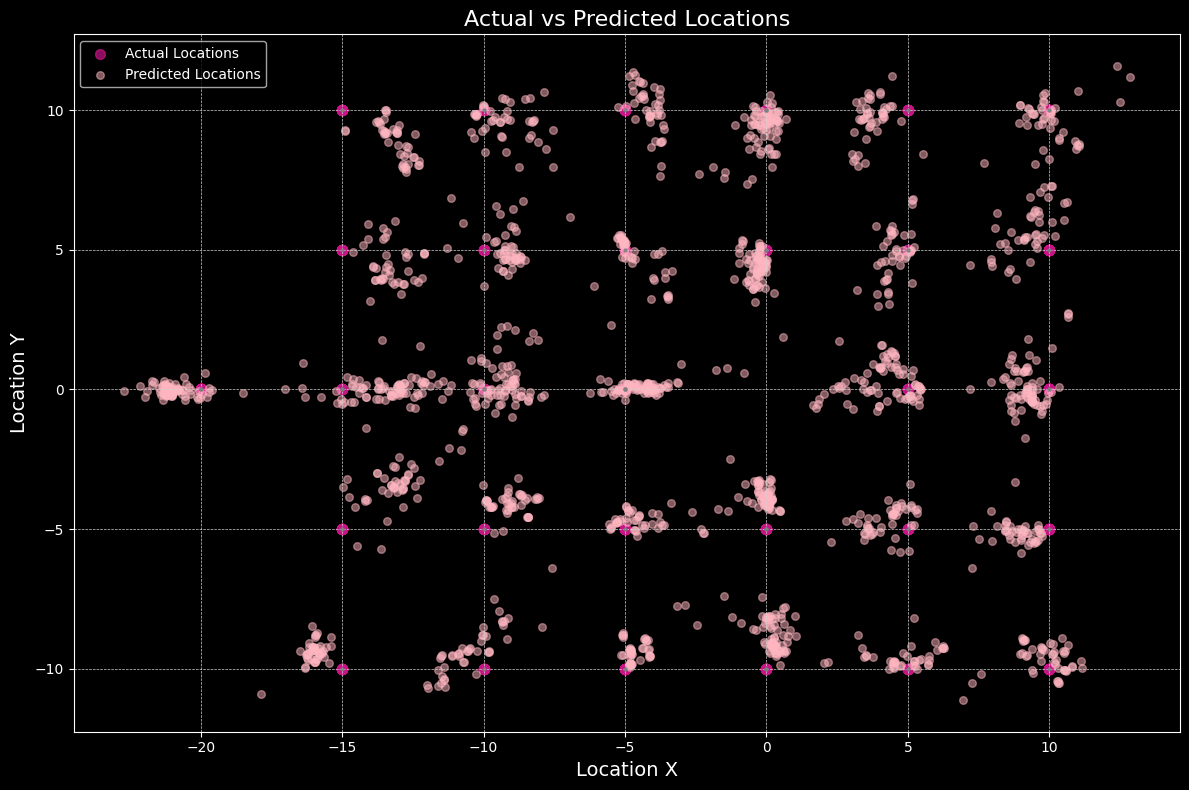

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib  # For loading the scaler
import matplotlib.pyplot as plt
import os

# Set seeds for reproducibility
import random
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------

# 1. Load the dataset
data = pd.read_csv("wifi_scan_results.csv")

# Drop rows with SSID 'L2G'
data = data[data['SSID'] != 'L2G'].copy()  # Added line to drop 'L2G' SSID

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate 'measurement_time' as seconds since the first measurement at each location
data['measurement_time'] = data.groupby(['Location_X', 'Location_Y'])['Timestamp'].transform(
    lambda x: (x - x.min()).dt.total_seconds()
)

# Negate 'Location_X' as in the original code
data['Location_X'] = -data['Location_X']
df = data.copy()

# Label Encoding for BSSID
le_bssid = LabelEncoder()
df['BSSID_encoded'] = le_bssid.fit_transform(df['BSSID'])

# One-Hot Encoding for Frequency
df = pd.get_dummies(df, columns=['Frequency (GHz)'], prefix='Freq')

# Determine the top N most frequent BSSIDs
top_n = 100  # Adjust based on your dataset
top_bssids = df['BSSID'].value_counts().nlargest(top_n).index.tolist()

# Ensure that the specific BSSIDs are included in top_bssids
specific_bssids = ["70:3A:0E:60:E8:E0", "70:3A:0E:60:E8:F0"]
for bssid in specific_bssids:
    if bssid not in top_bssids:
        top_bssids.append(bssid)

# Filter the dataframe to include only top BSSIDs
df_top = df[df['BSSID'].isin(top_bssids)].copy()

# Pivot RSSI values
wifi_rssi = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values='RSSI (dBm)',
    aggfunc='mean'
)

# Rename columns to indicate RSSI
wifi_rssi.columns = [f'RSSI_{bssid}' for bssid in wifi_rssi.columns]

# Pivot Frequency values
freq_cols = [col for col in df_top.columns if 'Freq_' in col]
wifi_freq = df_top.pivot_table(
    index='Timestamp',
    columns='BSSID',
    values=freq_cols,
    aggfunc='max'
)

# Flatten MultiIndex columns
wifi_freq.columns = [f"{freq}_{bssid}" for freq, bssid in wifi_freq.columns]

# Combine RSSI and Frequency
wifi_features = pd.concat([wifi_rssi, wifi_freq], axis=1)

# Fill missing RSSI with default value (e.g., -100 dBm)
wifi_features = wifi_features.fillna(-100)

# Fill missing Frequency with 0 (since one-hot)
wifi_features = wifi_features.fillna(0)

# Merge with location data
location = df_top.groupby('Timestamp')[['Location_X', 'Location_Y']].first()
features = wifi_features.merge(location, left_index=True, right_index=True)

# Define input features and target variables
X = features.drop(['Location_X', 'Location_Y'], axis=1)
y = features[['Location_X', 'Location_Y']]

# -------------------------------
# Load Pre-trained Model and Scaler
# -------------------------------

# Load the trained model
model = load_model('model.h5')

# Load the scaler
scaler = joblib.load('scaler.joblib')

# -------------------------------
# Generate Predictions
# -------------------------------

# Scale the input features
X_scaled = scaler.transform(X)

# Predict the locations
y_pred = model.predict(X_scaled)

# Create a DataFrame for predictions
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_X', 'Predicted_Y'], index=X.index)

# Optionally, calculate error metrics for all predictions
comparison = pd.concat([y.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
mse_x = mean_squared_error(comparison['Location_X'], comparison['Predicted_X'])
mae_x = mean_absolute_error(comparison['Location_X'], comparison['Predicted_X'])
mse_y = mean_squared_error(comparison['Location_Y'], comparison['Predicted_Y'])
mae_y = mean_absolute_error(comparison['Location_Y'], comparison['Predicted_Y'])

print("Overall Prediction Errors:")
print(f"Location_X - MSE: {mse_x:.2f}, MAE: {mae_x:.2f}")
print(f"Location_Y - MSE: {mse_y:.2f}, MAE: {mae_y:.2f}")

# -------------------------------
# Plotting with Matplotlib
# -------------------------------

plt.figure(figsize=(12, 8))
plt.style.use('dark_background')  # Set background to black

# Plot actual locations in Dark Pink
plt.scatter(
    y['Location_X'], 
    y['Location_Y'], 
    c='#C71585',          # Dark Pink (Crimson)
    alpha=0.7,            # Increased opacity for better visibility
    label='Actual Locations', 
    s=50
)

# Plot predicted locations in Light Pink
plt.scatter(
    y_pred_df['Predicted_X'], 
    y_pred_df['Predicted_Y'], 
    c='#FFB6C1',          # Light Pink
    alpha=0.5,            # Slightly more transparent
    label='Predicted Locations', 
    s=30
)

# Optionally, plot lines connecting actual and predicted locations
# for a subset to avoid clutter
sample_size = min(500, len(comparison))  # Adjust sample size as needed
sample_indices = np.random.choice(comparison.index, size=sample_size, replace=False)
plt.plot(
    comparison.loc[sample_indices, 'Location_X'], 
    comparison.loc[sample_indices, 'Location_Y'],
    marker='o', 
    markersize=2, 
    linestyle='', 
    alpha=0.1, 
    color='gray'
)

# Add legend with white text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color("white")  # Set legend text to white

# Add titles and labels with white color
plt.title('Actual vs Predicted Locations', fontsize=16, color='white')
plt.xlabel('Location X', fontsize=14, color='white')
plt.ylabel('Location Y', fontsize=14, color='white')

# Customize tick parameters for better visibility
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show grid with light gray lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file with transparent background if desired
plt.savefig('predicted_locations_map.png', dpi=300, facecolor='black')

# Display the plot
plt.show()
